In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("imdb_top_1000.csv")

In [34]:
(df.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    object 
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [9]:
df.describe()

,Released_Year,IMDB_Rating,No_of_Votes,Gross
count,1000.000000,1000.000000,1.000000e+03,8.310000e+02
mean,1991.221000,7.949300,2.736929e+05,6.803475e+07
std,23.285669,0.275491,3.273727e+05,1.097500e+08
min,1920.000000,7.600000,2.508800e+04,1.305000e+03
25%,1976.000000,7.700000,5.552625e+04,3.253559e+06
50%,1999.000000,7.900000,1.385485e+05,2.353089e+07
75%,2009.000000,8.100000,3.741612e+05,8.075089e+07
max,2020.000000,9.300000,2.343110e+06,9.366622e+08


In [3]:
df['Runtime'] = df['Runtime'].map(lambda x: x.rstrip('min'))
df = df.astype({"Runtime": "int"})
df = df.astype({"Released_Year": "int"})
df = df.astype({"No_of_Votes": "int"})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    object 
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(2), int64(3), object(11)
memory usage: 125.1+ KB


In [5]:
df[df["Runtime"] >= 180]["Series_Title"]

3                             The Godfather: Part II
5      The Lord of the Rings: The Return of the King
7                                   Schindler's List
25                                    The Green Mile
31                              Shichinin no samurai
59                                 Avengers: Endgame
71                       Once Upon a Time in America
116                               Lawrence of Arabia
139                               Bhaag Milkha Bhaag
140                               Gangs of Wasseypur
147                          The Wolf of Wall Street
156                           Swades: We, the People
177                                           Sholay
206                                       Kis Uykusu
240                                   Dil Chahta Hai
247                Lagaan: Once Upon a Time in India
258                      Dilwale Dulhania Le Jayenge
274                              Fanny och Alexander
278                                  The Deer 

In [23]:
df.shape

(1000, 16)

# Top 10 votes per year

Text(0.5, 1.0, 'Top 10 Total Votes per Year')

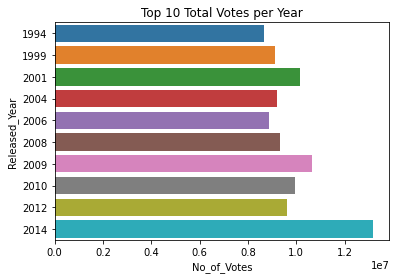

In [6]:
votesum = df.groupby("Released_Year")["No_of_Votes"].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="No_of_Votes", y="Released_Year", data=votesum, orient="h")
plt.title("Top 10 Total Votes per Year")

# Best Movie Decade

,Decade,IMDB_Rating
0,1920,8.127273
1,1930,7.966667
2,1940,8.025714
3,1950,8.058929
4,1960,7.973973
5,1970,7.969737
6,1980,7.953933
7,1990,7.960927
8,2000,7.899578
9,2010,7.924380


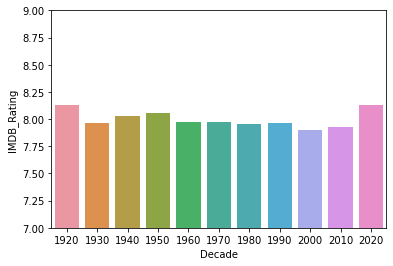

In [7]:
# Get decade of each year

def get_decade(year):
    return int(year/10) * 10

# Add decade to df

df["Decade"] = df["Released_Year"].apply(get_decade)

# Group by decade to calculate mean
newdf = df.groupby("Decade")["IMDB_Rating"].mean().reset_index()

# print(newdf.sort_values(by="IMDB_Rating", ascending=False))

gfg = sns.barplot(x="Decade", y="IMDB_Rating", data=newdf)
gfg.set_ylim(7,9)
newdf

# Attempt at getting the weighted average

In [8]:
def weighted_average(year):
    weighting = df["Normalized"]
    value = df["IMDB_Rating"]

    return (weighting * value).sum() / weighting.sum()

def normalize(i):
    return (i - min(df["Decade_Weight"])) / (max(df["Decade_Weight"] - min(df["Decade_Weight"]))
)

df['Decade_Count'] = df.groupby('Decade')['Decade'].transform('size')
df["Decade_Weight"] = (df["Decade_Count"]/ 1000)
df["Normalized"] = df["Decade_Weight"].apply(normalize)
# df

In [9]:
import numpy as np
g = df.groupby("Decade")
df.groupby(df.Decade).apply(lambda x: np.average(x.IMDB_Rating, weights=x.Decade_Weight))

# df["Weighted_Average"] = (df.Normalized/g.Normalized.transform("sum") * df.IMDB_Rating)
# for i in df["Normalized"]:
#     df["Weighted_Average"] = sum(df['IMDB_Rating'] * df['Normalized']) / sum(df['Normalized'])

# newdf = df.groupby("Weighted_Average")["IMDB_Rating"].mean().reset_index()
# df


Decade
1920    8.127273
1930    7.966667
1940    8.025714
1950    8.058929
1960    7.973973
1970    7.969737
1980    7.953933
1990    7.960927
2000    7.899578
2010    7.924380
2020    8.133333
dtype: float64

In [10]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade,Decade_Count,Decade_Weight,Normalized
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1990,151,0.151,0.614407
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,1970,76,0.076,0.296610
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,2000,237,0.237,0.978814
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,1970,76,0.076,0.296610
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,1950,56,0.056,0.211864


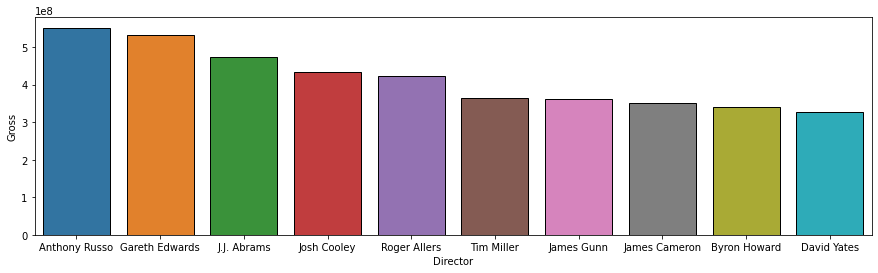

In [13]:
top_director = df.groupby("Director")["Gross"].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15,4))
g = sns.barplot(x='Director',y='Gross',data=top_director,edgecolor='black')
# top_director

<Axes: xlabel='IMDB_Rating', ylabel='Gross'>

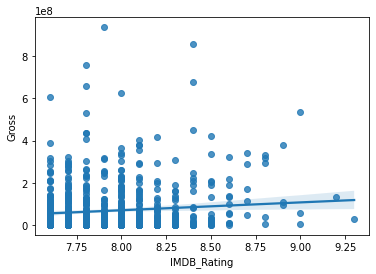

In [38]:
sns.regplot(x='IMDB_Rating',y='Gross',data=df)

<Axes: xlabel='Runtime', ylabel='IMDB_Rating'>

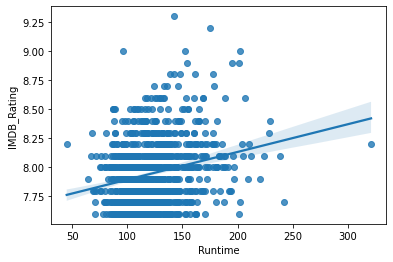

In [41]:
sns.regplot(x='Runtime',y='IMDB_Rating',data=df)

# Rotten Tomatoes dataset

In [15]:
rtdf = pd.read_csv("rt/rotten_tomatoes_movies.csv")
rtdf.shape


/tmp/ipykernel_7455/170452414.py:1: DtypeWarning: Columns (2,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  rtdf = pd.read_csv("rt/rotten_tomatoes_movies.csv")


(143256, 16)

# Initial join on only Series_Title

In [27]:
megadf = pd.merge(df, rtdf, how="inner", on="Series_Title")
megadf.head() 
megadf.to_csv("megadf.csv")

In [28]:
megadf.dropna(subset=["ratingContents"], inplace=True)
megadf.to_csv("megadf2.csv")

In [17]:
# rtdf.dropna(subset=["ratingContents"], inplace=True)
rtdf["releaseDateTheaters"] = pd.to_datetime(rtdf["releaseDateTheaters"])
rtdf["Released_Year"] = rtdf["releaseDateTheaters"].dt.strftime("%Y")




In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    object 
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
 16  Decade         1000 non-null   int64  
 17  Decade_Count   1000 non-null   int64  
 18  Decade_We

In [19]:
rtdf.dropna(subset=["Released_Year"], inplace=True)
df = df.astype({"Released_Year": "int"})
rtdf = rtdf.astype({"Released_Year": "int"})
# rtdf


# Joining on Year AND Title

In [20]:
both_df = df.merge(rtdf, on=['Released_Year', 'Series_Title'])

In [33]:
both_df.to_csv("merged.csv")

testdf = both_df.tail(20)

In [21]:
both_df.shape

(624, 31)

In [44]:

both_df = both_df.astype({"audienceScore": "int"})
# both_df = both_df.astype({"audienceScore": "int"})

both_df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Poster_Link           624 non-null    object        
 1   Series_Title          624 non-null    object        
 2   Released_Year         624 non-null    int64         
 3   Certificate           590 non-null    object        
 4   Runtime               624 non-null    int64         
 5   Genre                 624 non-null    object        
 6   IMDB_Rating           624 non-null    float64       
 7   Overview              624 non-null    object        
 8   Meta_score            578 non-null    object        
 9   Director              624 non-null    object        
 10  Star1                 624 non-null    object        
 11  Star2                 624 non-null    object        
 12  Star3                 624 non-null    object        
 13  Star4               

<Axes: xlabel='audienceScore', ylabel='tomatoMeter'>

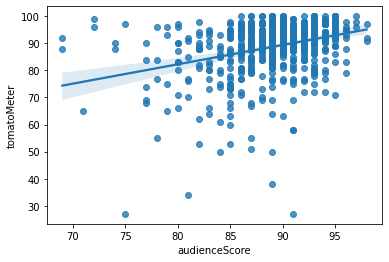

In [45]:
sns.regplot(data=both_df, x="audienceScore", y="tomatoMeter")

<Axes: xlabel='tomatoMeter', ylabel='IMDB_Rating'>

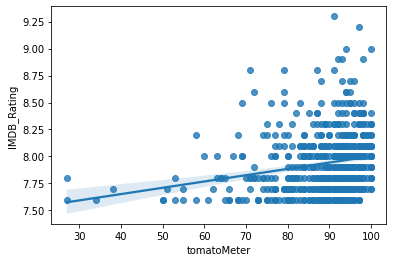

In [25]:
sns.regplot(data=both_df, x="tomatoMeter", y="IMDB_Rating")

In [23]:
both_df[both_df["tomatoMeter"] <= 60]["IMDB_Rating"]

77     8.2
189    8.0
378    7.8
383    7.8
462    7.7
464    7.7
473    7.7
569    7.6
575    7.6
580    7.6
584    7.6
588    7.6
589    7.6
594    7.6
Name: IMDB_Rating, dtype: float64

In [24]:
both_df = both_df.drop_duplicates()
both_df.to_csv("merged.csv")

/home/reda/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


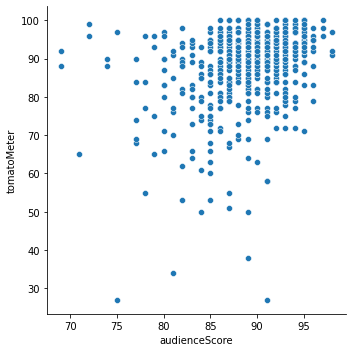

In [25]:
sns.relplot(data=both_df, x="audienceScore", y="tomatoMeter")

In [26]:
both_df = pd.read_csv("merged.csv")

In [27]:
# both_df['tomatoMeter'].corr(both_df['audienceScore'])
# both_df.info()
both_df.dropna(subset=["tomatoMeter"], inplace=True)
both_df = both_df.astype({"tomatoMeter": "int"})
both_df = both_df.astype({"audienceScore": "int"})
# both_df.dropna()

In [29]:
print(both_df['audienceScore'].corr(both_df['tomatoMeter']))
print(both_df['tomatoMeter'].corr(both_df['IMDB_Rating']))
print(both_df['audienceScore'].corr(both_df['IMDB_Rating']))

0.3139396495998264
0.21167929664801452
0.5306506737853295


/home/reda/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


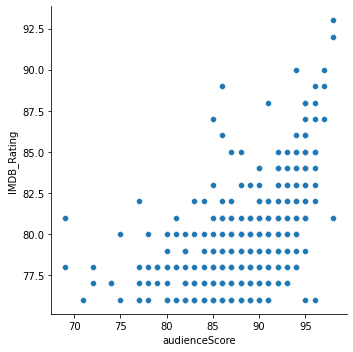

In [67]:
both_df["IMDB_Rating"] = both_df["IMDB_Rating"] / 100

sns.relplot(data=both_df, x="audienceScore", y="IMDB_Rating")

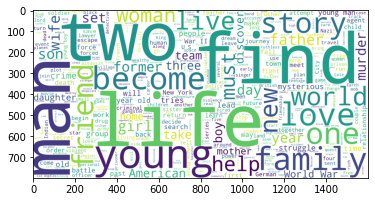

In [7]:
df = df.astype({"Overview": "string"})

wc = WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color="white").generate(" ".join(df["Overview"]))

plt.imshow(wc)